정형데이터 -> 충분한 데이터 -> 머신 러닝
비정형 데이터 -> 자연어 처리 필요 -> 자연어 처리 기법 -> 딥러닝???

앙상블 방법
    서로 다른 같은 알고리즘을 단순히 결합한 형태도 있다.
    배깅
    부스팅
    
결정트리
    가능한 한 적은 결정노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 셋이 분류에 속할 수 있어야 한다.
    최대한 균일한 데이터 세트를 구성하여야 한다.
    
    
균일도
    얼마나 같은 정보로 이루어져 있는가?
    이를 수치화 하기 위한, 정보 이득 지수와 지니 계수가 있다.
    모델 옵션 중 criterion 에서 어떤 걸 기준으로 데이터를 분류하는지 정할 수 있다.
    
정보이득
    엔트로피 개념 기반, 1-엔트로피 지수 정보 이득이 높은 속성을 기준으로 분할한다.
    
지니계수
    본래 경제학에서 불평등 지수로 사용되던 지표, 0으로 갈수고 평등하고 1으로 갈수록 불평등하다. 낮은 속성을 기분으로 분할한다.
    
결정트리 모델
    정보의 균일도라는 규칙을 기반으로한 알고리즘으로, 쉽고 직관적이다.
    과적합으로 정확도가 떨어진다. -> 옵션을 사용해 튜닝
    
결정트리 파라미터
    min_samples_split
    min_samples_leaf
    max_features
    max_depth
    max_leaf_nodes
    

결정트리 모델 시각화
https://graphviz.org/download/
conda install graphviz
    
    


In [1]:
# import 문
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# 모델 생성, 데이터 분리&학습
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

In [4]:
# iris.dot 파일 생성
export_graphviz(dt_clf,
                'iris.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)


# decision_tree,
#     out_file=None,
#     *,
#     max_depth=None,
#     feature_names=None,
#     class_names=None,
#     label='all',
#     filled=False,
#     leaves_parallel=False,
#     impurity=True,
#     node_ids=False,
#     proportion=False,
#     rotate=False,
#     rounded=False,
#     special_characters=False,
#     precision=3,
#     fontname='helvetica',

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import graphviz

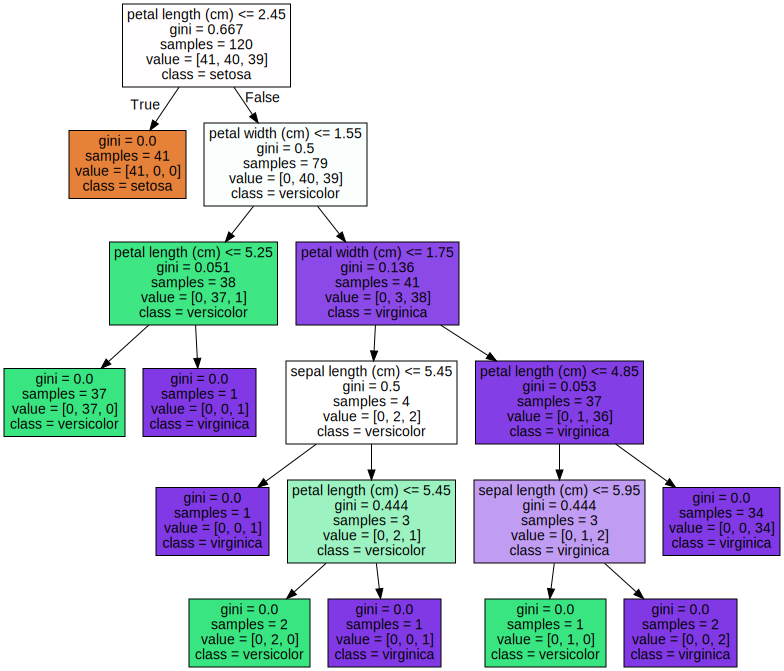

In [7]:
with open('iris.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
# value = [41,40,39]
# -> gini = 0, value = [41,0,0]
# -> gini = 0.5, value = [0,40,39]
#  -> gini = 0.051, value = [0,37,1]
#  -> gini = 0.136, value = [0,3,38]

# 말단 노드에는 한 종류만 존재
# 과적합 문제



In [8]:
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_split= 5, max_features = 3)
# 노드에 min_samples_split 이상 있어야만 새로운 노드로 갈라진다.
# max_leaf_nodes
# max_features 사용하는 콜럼의 종류의 최댓값
dt_clf.fit(X_train,y_train)

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)


export_graphviz(dt_clf,
                'iris.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

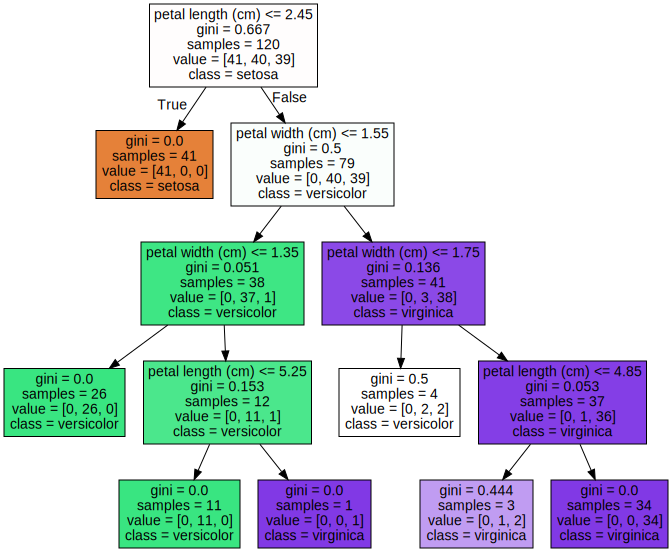

In [9]:
with open('iris.dot') as f:
    dot_graph = f.read()
    
    
graphviz.Source(dot_graph)

In [10]:
dt_clf.feature_importances_
# 각 콜럼이 얼마나 쓰였는지 %

array([0.        , 0.        , 0.56015145, 0.43984855])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
import seaborn as sns

<AxesSubplot:>

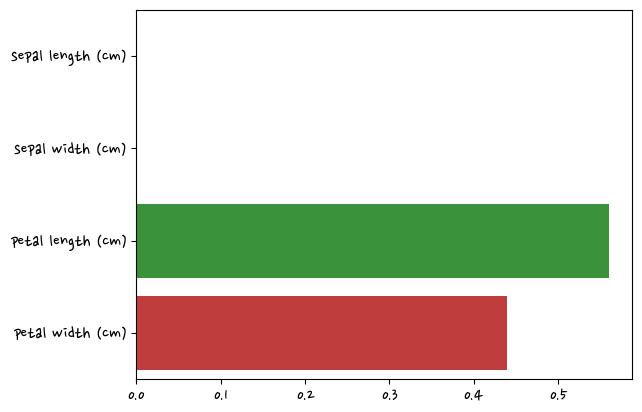

In [13]:
sns.barplot(x = dt_clf.feature_importances_ , y = iris.feature_names)

In [14]:
import pandas as pd
import func01
df = pd.read_csv('titanic.csv')
X = df.drop(columns = 'Survived')
y = df.Survived
X = func01.transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 11)

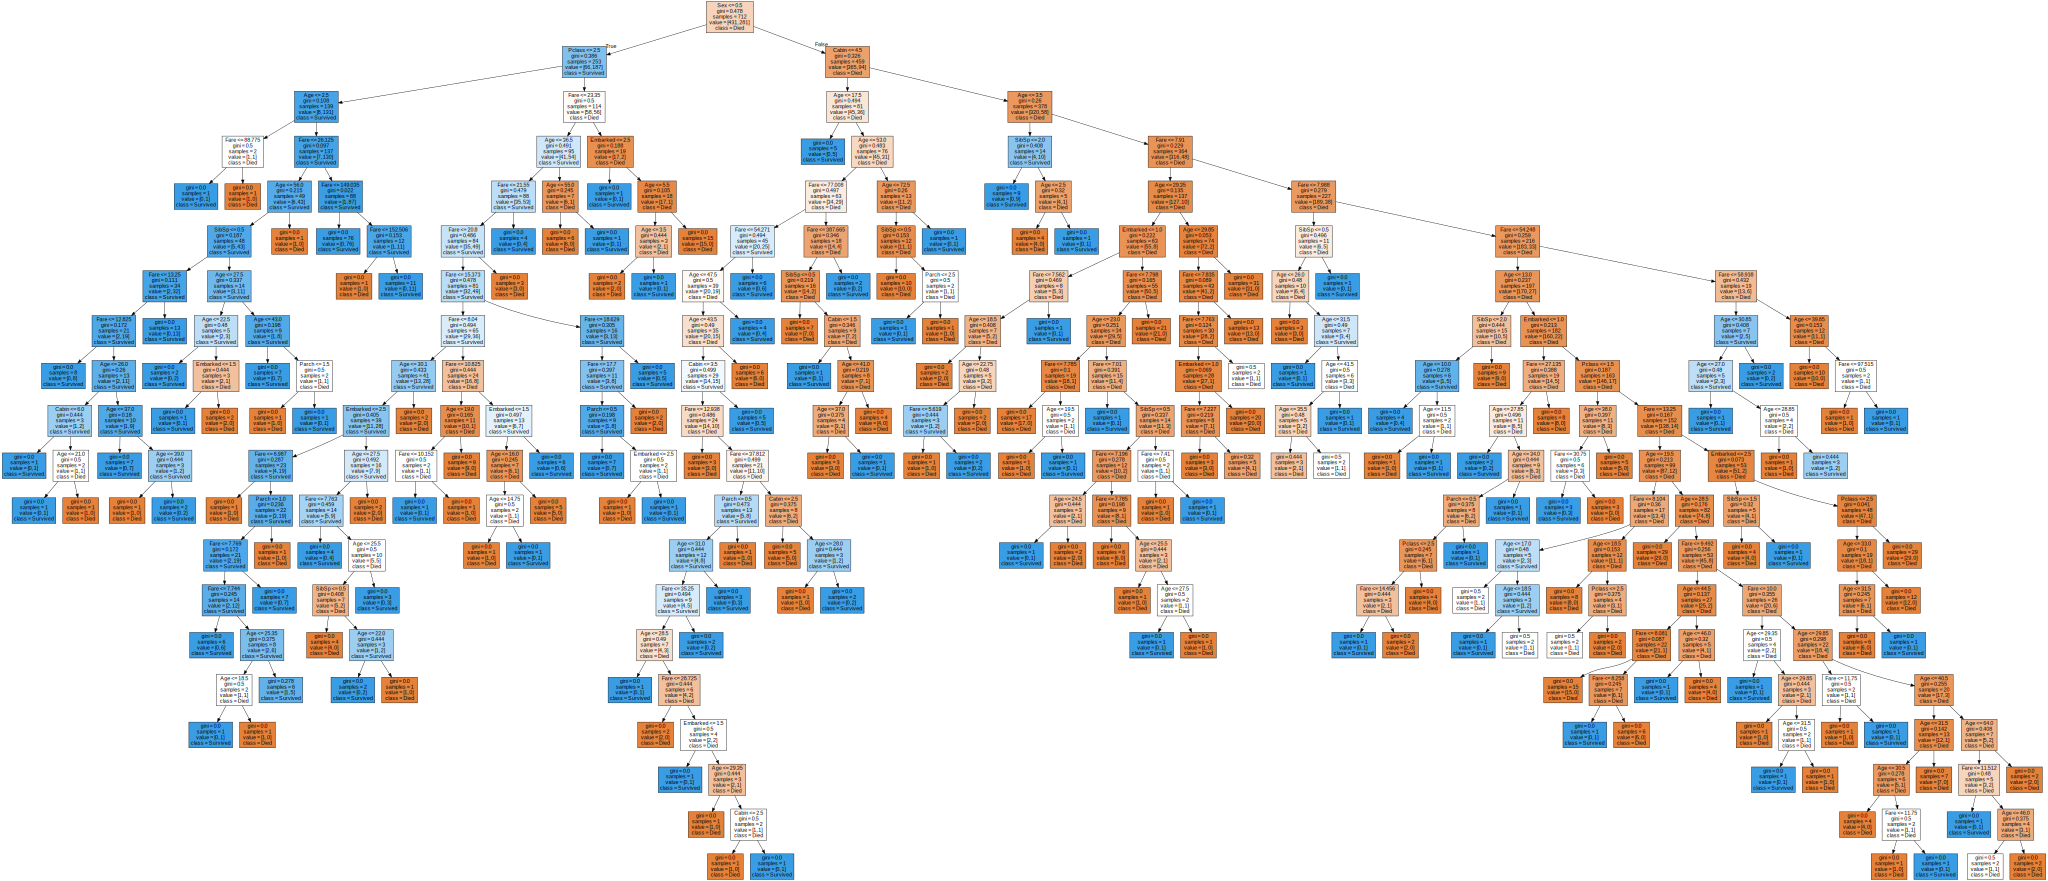

In [16]:
dt_clf =  DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,
                'titanic.dot',
                class_names=['Died', 'Survived'],
                feature_names=X.columns,
                filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()
    
    
graphviz.Source(dot_graph)

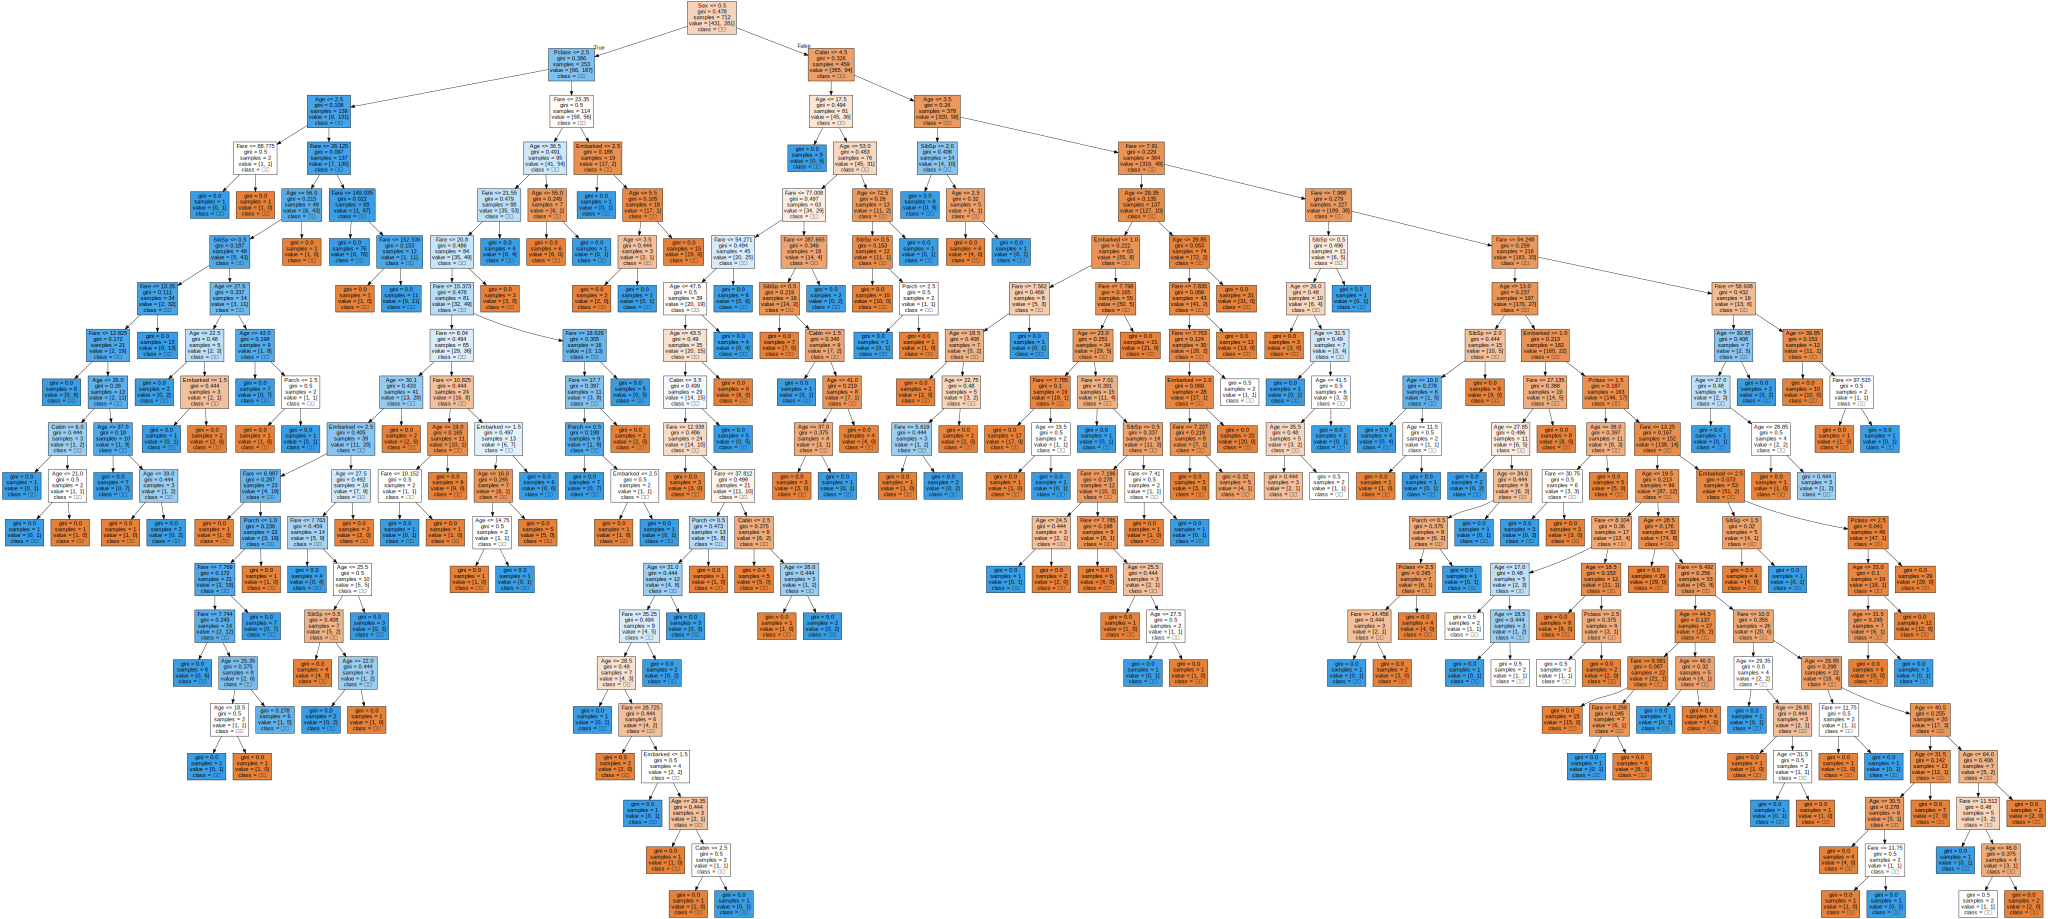

In [17]:
dt_clf =  DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,
                'titanic.dot',
                class_names=['사망', '생존'],
                feature_names=X_train.columns,
                filled=True)
with open('titanic.dot',encoding='utf8') as f:
    dot_graph = f.read()
    
    
graphviz.Source(dot_graph)

<AxesSubplot:>

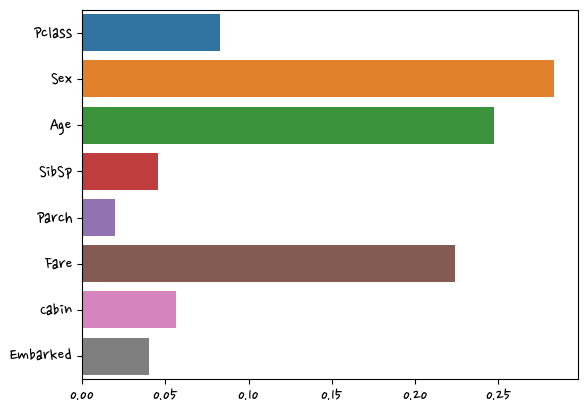

In [18]:
sns.barplot(x = dt_clf.feature_importances_ , y = X.columns)

In [19]:
# iris의 데이터를 시각화
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [20]:
X,y = make_classification(n_features=2, n_redundant=0,n_classes=3,n_clusters_per_class=1,random_state=0)

# x, Lavel
# 평면, 좌표계 이미지로 두개의 컬럼으로만 만들 수 있다.

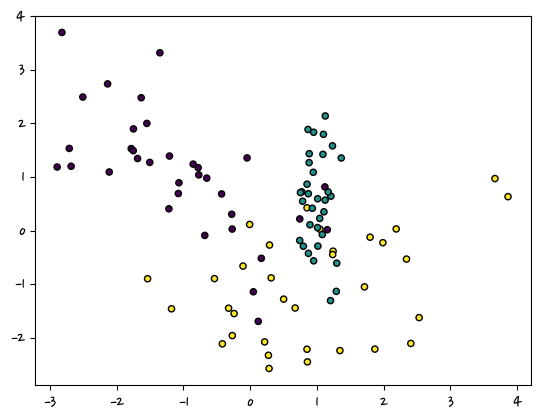

In [21]:
plt.rcParams['axes.unicode_minus']= False
# -부호 폰트 깨짐
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',s=20)

#  c  0,1,2  

In [22]:
​﻿​# 학습 모델의 시각화 
dt_clf = DecisionTreeClassifier(random_state=156).fit(X,y)

C:\pythonDir\05_machinelearning\func01.py:52: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


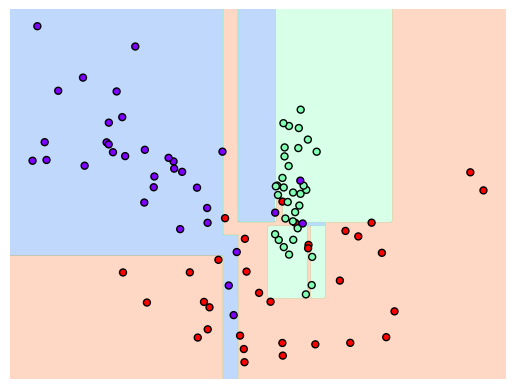

In [23]:
func01.visualize_boundary(dt_clf,X,y)

C:\pythonDir\05_machinelearning\func01.py:52: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


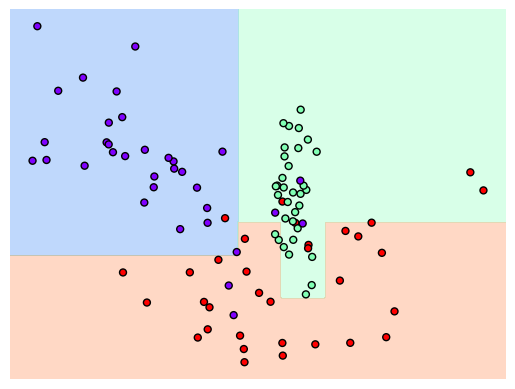

In [27]:
#min_samples_leaf , 노드 갈라짐 제한 옵션을 통해 이상치에 대한 분류를 제한하였다.
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf = 5).fit(X,y)
func01.visualize_boundary(dt_clf,X,y)